 # 베이지안 머신러닝

###  박태영 교수
### 연세대학교 응용통계학과

### Outline

### 4. 베이지안 A/B 테스트
    4.1 전환율 추정
    4.2 전환수 예측

#### 4.1 전환율 추정

- **A/B 테스트**: A안과 B안을 비교하여 가장 효과적인 안을 검정하는 방법
- **전환율**: 대상으로 하는 고객 중에서 소정의 유도된 행위를 한 비율

- **`A`안**: 1312명의 대상 고객, 40명의 전환 고객
- **`B`안**: 1067명의 대상 고객, 38명의 전환 고객

In [1]:
n_A = 1312; x_A = 40
n_B = 1067; x_B = 38

- 전환율은 (0,1) 사이의 값을 가지므로 베타 사전분포를 사용
- 사전분포의 초모수를 `a`와 `b`로 정함 

In [2]:
a = 1
b = 1

- 필요한 모듈을 설치

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import beta, binom
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def beta_post(n,x,a,b,type='samp',nsamp=10000):
    if type=='mean': # 베타 사후 분포의 평균 계산
        mean = (x+a)/(n+a+b)
        return mean
    elif type=='median': # 베타 사후 분포의 중앙값 계산
        median = beta.ppf(0.5,x+a,n-x+b)
        return median
    elif type=='mode': # 베타 사후 분포의 최빈값 계산
        mode = (x+a-1)/(n+a+b-2)
        return mode
    elif type=='samp': # 베타 사후 분포의 시뮬레이션
        rsamp = beta.rvs(x+a,n-x+b,size=nsamp)
        return rsamp

#### (1) 평균 전환율

- 대상으로 한 고객 중 전환된 비율의 평균

In [5]:
th_A = beta_post(n_A,x_A,a,b,'mean')
th_B = beta_post(n_B,x_B,a,b,'mean')
print('A안의 평균 전환율 = {}%'.format(np.round(th_A*100,2))) # format 메서드 사용
print('B안의 평균 전환율 = {}%'.format(np.round(th_B*100,2))) # format 메서드 사용

A안의 평균 전환율 = 3.12%
B안의 평균 전환율 = 3.65%


- 대상으로 한 고객 중 전환된 비율의 중앙값
- 대상으로 한 고객 중 전환된 비율의 최빈값

In [6]:
th_A = beta_post(n_A,x_A,a,b,'median')
th_B = beta_post(n_B,x_B,a,b,'median')
print('A안의 중앙 전환율 = {}%'.format(np.round(th_A*100,2))) # format 메서드 사용
print('B안의 중앙 전환율 = {}%'.format(np.round(th_B*100,2))) # format 메서드 사용
th_A = beta_post(n_A,x_A,a,b,'mode')
th_B = beta_post(n_B,x_B,a,b,'mode')
print('A안의 최빈 전환율 = {}%'.format(np.round(th_A*100,2))) # format 메서드 사용
print('B안의 최빈 전환율 = {}%'.format(np.round(th_B*100,2))) # format 메서드 사용

A안의 중앙 전환율 = 3.1%
B안의 중앙 전환율 = 3.62%
A안의 최빈 전환율 = 3.05%
B안의 최빈 전환율 = 3.56%


#### (2) 전환율 평균 개선 정도

- 기존안 대비 전환율의 평균 개선 정도

In [7]:
th_A_samp = beta_post(n_A,x_A,a,b) # 1만개 샘플
th_B_samp = beta_post(n_B,x_B,a,b) # 1만개 샘플

In [8]:
th_diff = th_B_samp-th_A_samp
print('기존안 대비 전환율 평균 개선 정도 = {}%'.format(np.round(np.mean(th_diff/th_A_samp)*100,2)))

기존안 대비 전환율 평균 개선 정도 = 19.85%


#### (3) 전환율 개선 확률

- 기존안보다 전환율이 높을 확률 

In [9]:
print('기존안보다 전환율이 개선될 확률 = {}%'.format(np.round(np.mean(th_diff>0)*100,2)))

기존안보다 전환율이 개선될 확률 = 76.08%


#### (4) 전환율 시각화

In [10]:
cvr = pd.DataFrame({'A':th_A_samp,'B':th_B_samp})

In [11]:
A_mode   = beta_post(n_A,x_A,a,b,'mode')
A_mean   = beta_post(n_A,x_A,a,b,'mean')
A_median = beta_post(n_A,x_A,a,b,'median')

B_mode   = beta_post(n_B,x_B,a,b,'mode')
B_mean   = beta_post(n_B,x_B,a,b,'mean')
B_median = beta_post(n_B,x_B,a,b,'median')

- 전환율

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\4158755691.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cvr['A'],color='green',shade='Fill',label='A')
C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\4158755691.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cvr['B'],color='blue',shade='Fill',label='B')


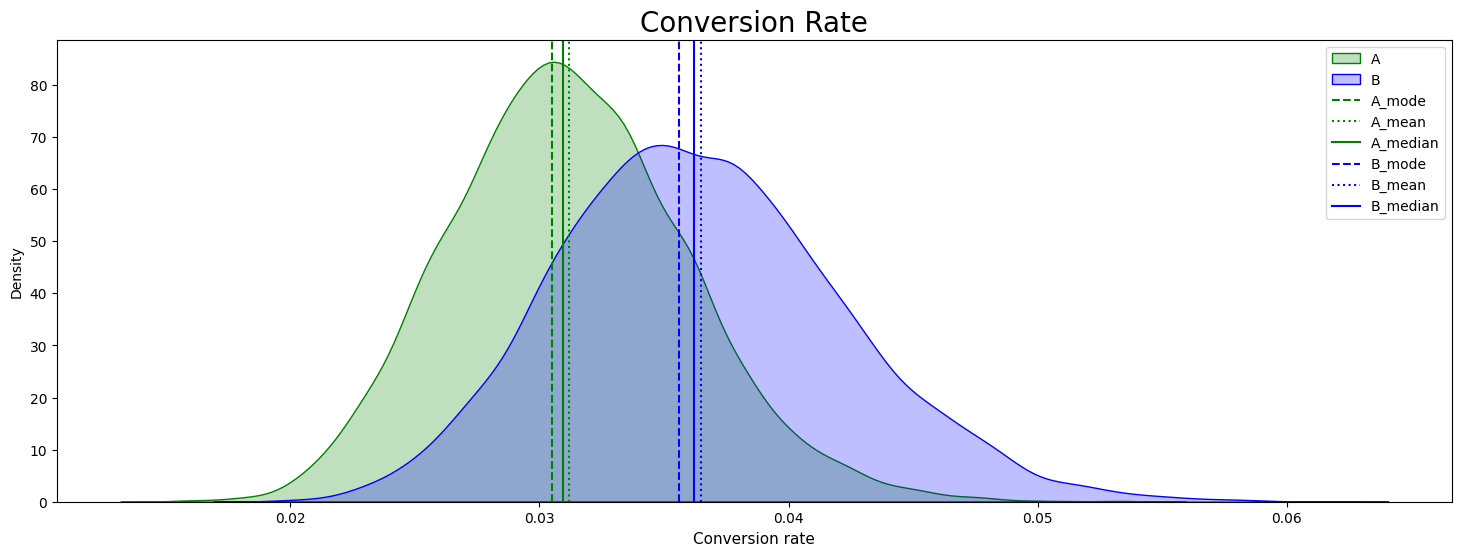

In [12]:
plt.figure(figsize=(18,6))

sns.kdeplot(cvr['A'],color='green',shade='Fill',label='A')
sns.kdeplot(cvr['B'],color='blue',shade='Fill',label='B')
plt.xlabel('Conversion rate', fontsize=11)

plt.axvline(A_mode,ls='--',color='green',label='A_mode')
plt.axvline(A_mean,ls=':',color='green',label='A_mean')
plt.axvline(A_median,color='green',label='A_median')

plt.axvline(B_mode,ls='--',color='blue',label='B_mode')
plt.axvline(B_mean,ls=':',color='blue',label='B_mean')
plt.axvline(B_median,color='blue',label='B_median')

plt.legend()
plt.title('Conversion Rate',size=20)
plt.show()

- 기존안과 개선안의 전환율을 상대적으로 비교
- 기존안 대비 전환율의 개선 정도에 대한 분포

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\725385919.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot((cvr['B']-cvr['A'])*100/cvr['A'],color='red',shade='Fill',label='relative change')


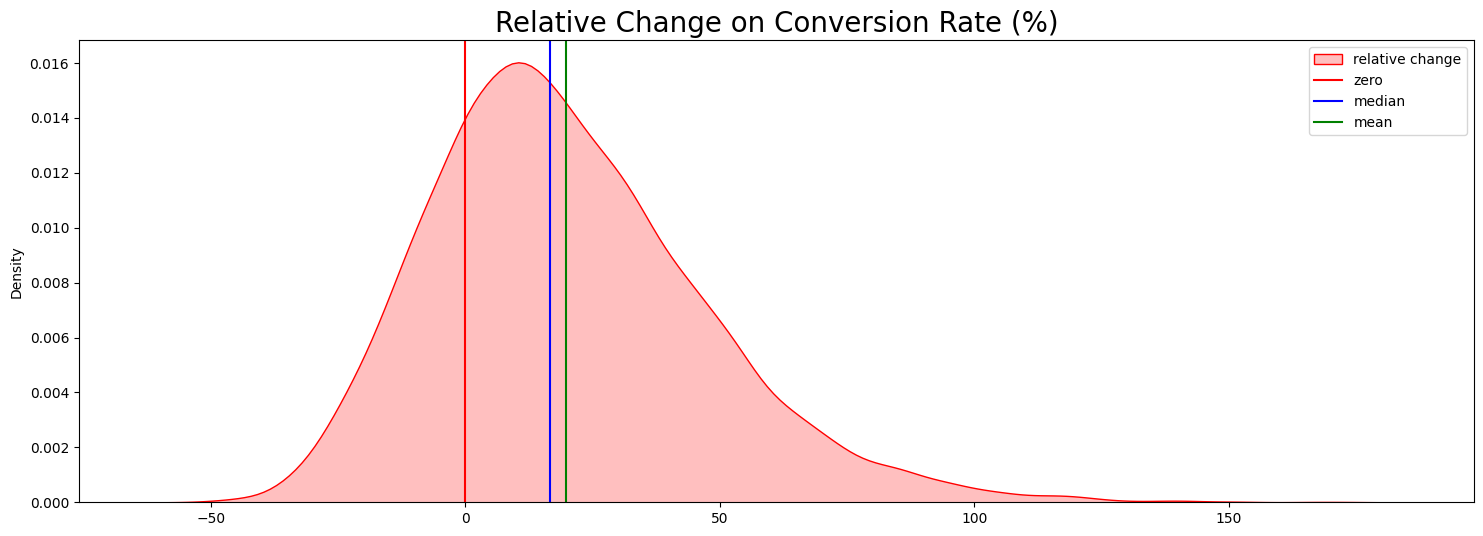

In [13]:
plt.figure(figsize=(18,6))


mean   = np.mean((cvr['B']-cvr['A'])*100/cvr['A'])
median = np.median((cvr['B']-cvr['A'])*100/cvr['A'])

sns.kdeplot((cvr['B']-cvr['A'])*100/cvr['A'],color='red',shade='Fill',label='relative change')

plt.axvline(0,color='red',label='zero')
plt.axvline(median,color='blue',label='median')
plt.axvline(mean,color='green',label='mean')

plt.legend()
plt.title('Relative Change on Conversion Rate (%)',size=20)
plt.show()

- 기존안과 개선안의 전환율을 절대적으로 비교

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\1762664555.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cvr['B']-cvr['A'],color='red',shade='Fill',label='improvement')


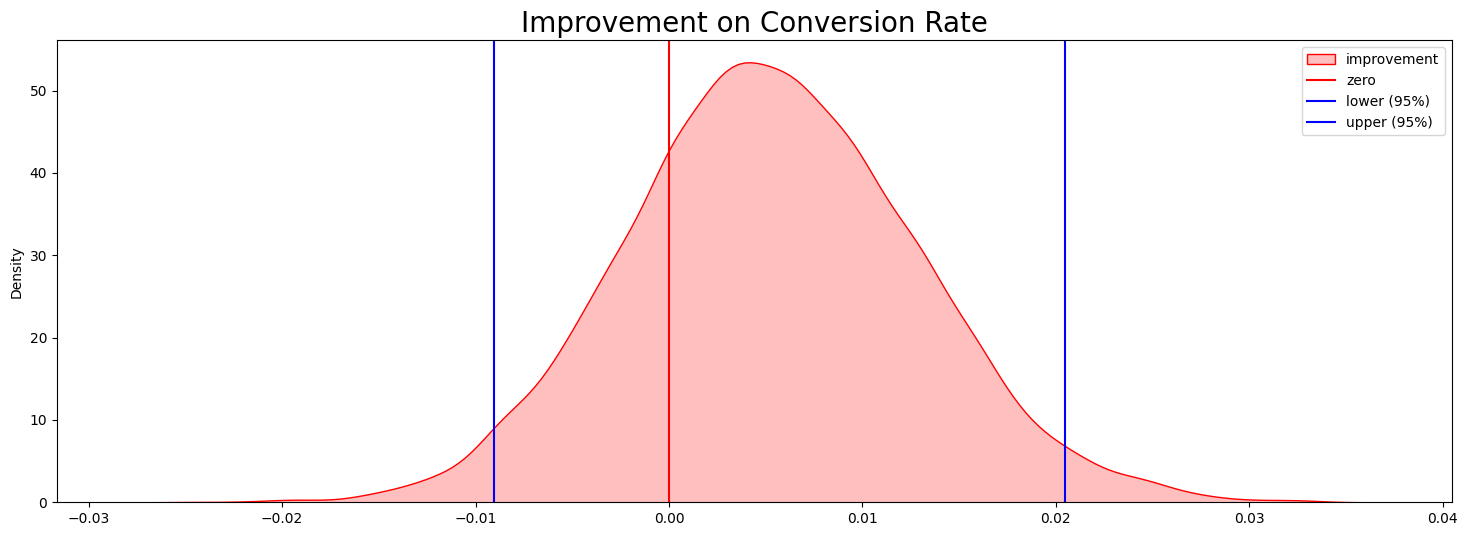

In [14]:
plt.figure(figsize=(18,6))

lower = np.percentile(cvr['B']-cvr['A'],2.5)
upper = np.percentile(cvr['B']-cvr['A'],97.5)

sns.kdeplot(cvr['B']-cvr['A'],color='red',shade='Fill',label='improvement')

plt.axvline(0,color='red',label='zero')
plt.axvline(lower,color='blue',label='lower (95%)')
plt.axvline(upper,color='blue',label='upper (95%)')

plt.legend()
plt.title('Improvement on Conversion Rate',size=20)
plt.show()

#### 3.3 전환수 예측

In [15]:
n_A = n_B = 10000
x_A_samp = binom.rvs(n_A,th_A_samp) # 1만명당 A안의 사후 예측 표본
x_B_samp = binom.rvs(n_B,th_B_samp) # 1만명당 B안의 사후 예측 표본

#### (1) 1만명당 평균 전환수

- 전환을 시도한 1만명의 고객 중 전환된 수의 평균

In [16]:
print('1만명당 A안의 평균 전환수 = {}'.format(np.round(np.mean(x_A_samp)))) 
print('1만명당 B안의 평균 전환수 = {}'.format(np.round(np.mean(x_B_samp)))) 

1만명당 A안의 평균 전환수 = 312.0
1만명당 B안의 평균 전환수 = 365.0


In [17]:
lower_A = np.round(np.percentile(x_A_samp,2.5))
upper_A = np.round(np.percentile(x_A_samp,97.5))
lower_B = np.round(np.percentile(x_B_samp,2.5))
upper_B = np.round(np.percentile(x_B_samp,97.5))
print('1만명당 A안의 전환수에 대한 95% 신용구간 = ({},{})'.format(lower_A,upper_A)) 
print('1만명당 B안의 전환수에 대한 95% 신용구간 = ({},{})'.format(lower_B,upper_B))

1만명당 A안의 전환수에 대한 95% 신용구간 = (219.0,417.0)
1만명당 B안의 전환수에 대한 95% 신용구간 = (256.0,492.0)


#### (2) 전환수 평균 개선 정도

- 기존안 대비 전환된 고객수의 증감율에 대한 평균

In [18]:
count_diff = x_B_samp-x_A_samp
print('기존안 대비 전환수 평균 개선 정도 = {}%'.format(np.round(np.mean(count_diff/x_A_samp)*100,2)))

기존안 대비 전환수 평균 개선 정도 = 20.31%


#### (3) 전환수 개선 확률

- 기존안보다 전환된 고객의 수가 높을 확률

In [19]:
print('기존안보다 전환수가 개선될 확률 = {}%'.format(np.round(np.mean(count_diff>0)*100,2)))

기존안보다 전환수가 개선될 확률 = 74.84%


#### (4) 전환수 예측 시각화

In [20]:
cv_pred = pd.DataFrame({'A':x_A_samp,'B':x_B_samp})

In [21]:
A_mean   = np.mean(cv_pred['A'])
A_median = np.median(cv_pred['A'])

B_mean   = np.mean(cv_pred['B'])
B_median = np.median(cv_pred['B'])

- 1만명당 전환수

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\1895372697.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cv_pred['A'],color='green',shade='Fill',label='A')
C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\1895372697.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cv_pred['B'],color='blue',shade='Fill',label='B')


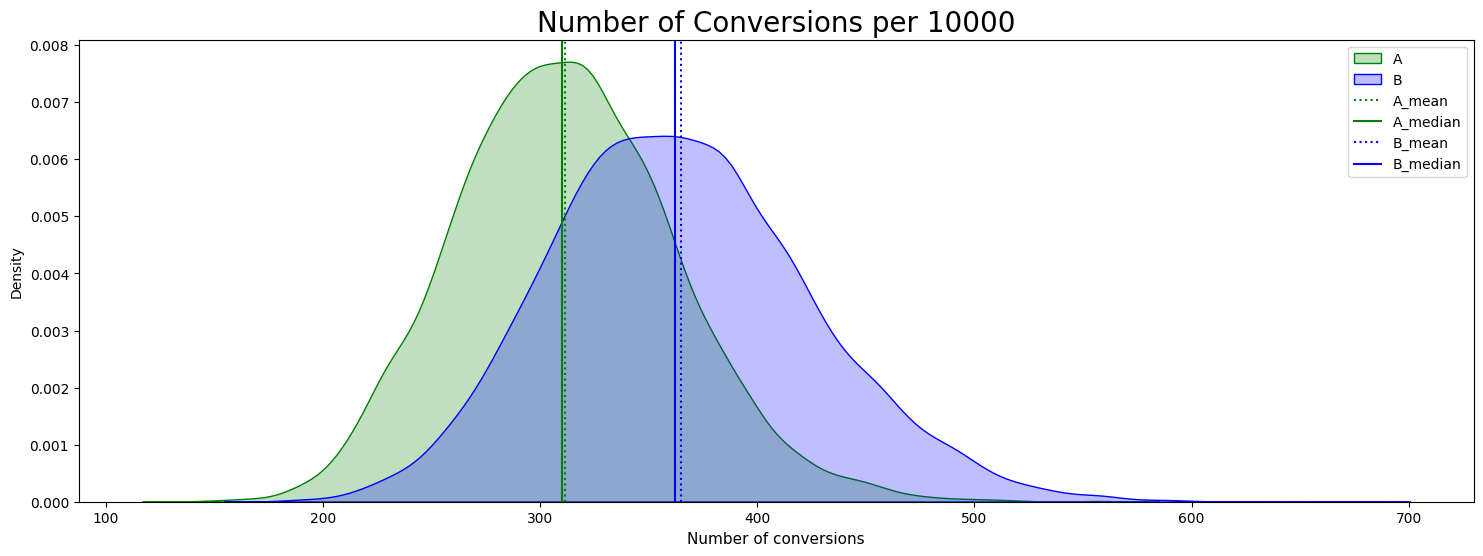

In [22]:
plt.figure(figsize=(18,6))

sns.kdeplot(cv_pred['A'],color='green',shade='Fill',label='A')
sns.kdeplot(cv_pred['B'],color='blue',shade='Fill',label='B')
plt.xlabel('Number of conversions', fontsize=11)

plt.axvline(A_mean,ls=':',color='green',label='A_mean')
plt.axvline(A_median,color='green',label='A_median')

plt.axvline(B_mean,ls=':',color='blue',label='B_mean')
plt.axvline(B_median,color='blue',label='B_median')

plt.legend()
plt.title('Number of Conversions per 10000',size=20)
plt.show()

- 기존안과 개선안의 전환수를 상대적으로 비교
- 기존안 대비 전환수의 개선 정도에 대한 분포

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\3836478825.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot((cv_pred['B']-cv_pred['A'])*100/cv_pred['A'],color='red',shade='Fill',label='relative change')


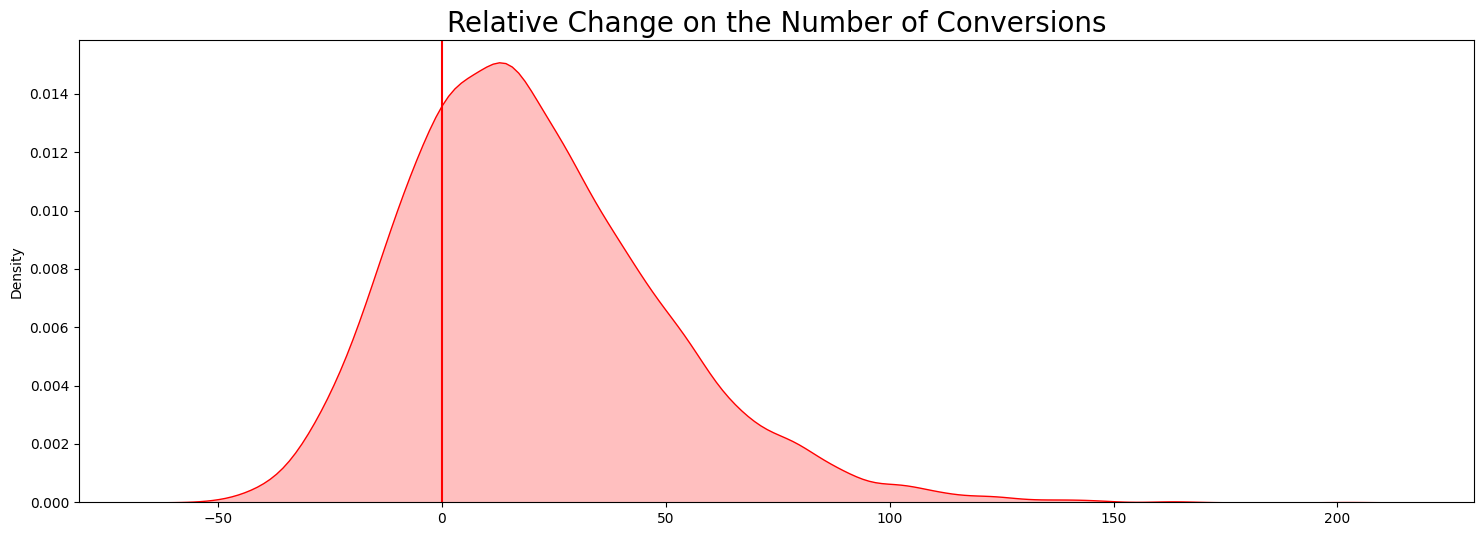

In [23]:
plt.figure(figsize=(18,6))

sns.kdeplot((cv_pred['B']-cv_pred['A'])*100/cv_pred['A'],color='red',shade='Fill',label='relative change')
plt.axvline(0,color='red',label='zero')

plt.title('Relative Change on the Number of Conversions',size=20)
plt.show()

- 기존안과 개선안의 전환수를 절대적으로 비교

C:\Users\jaeyeon\AppData\Local\Temp\ipykernel_7360\1054417676.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cv_pred['B']-cv_pred['A'],color='red',shade='Fill',label='improvement')


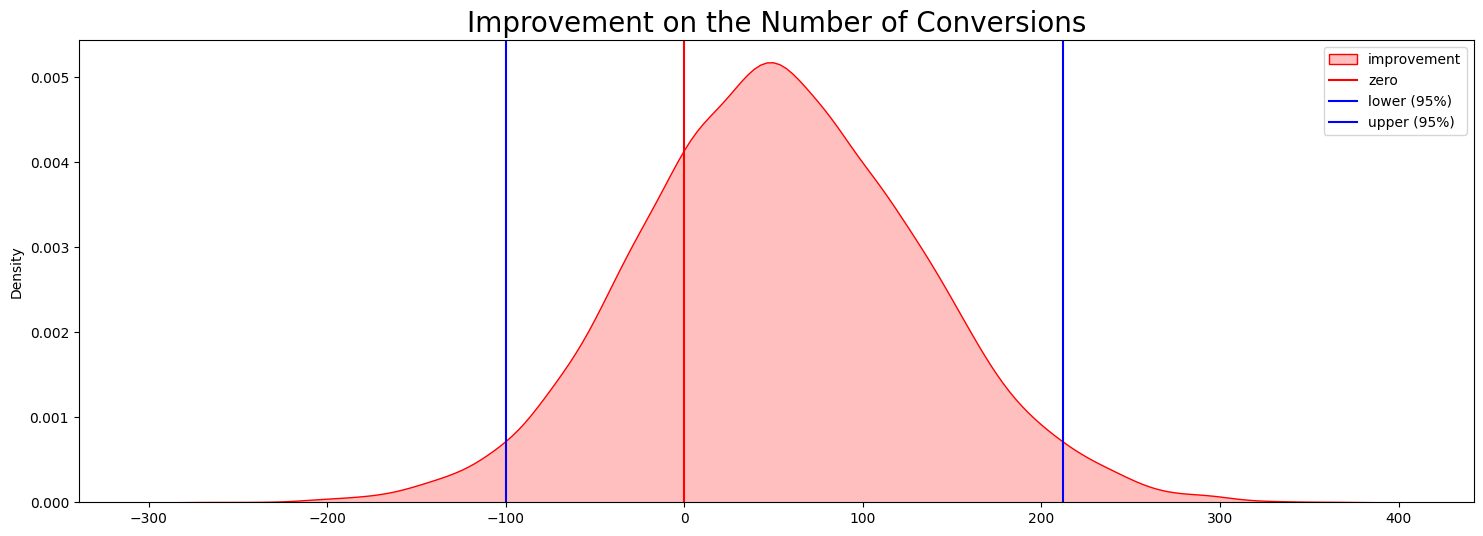

In [24]:
plt.figure(figsize=(18,6))

lower = np.percentile(cv_pred['B']-cv_pred['A'],2.5)
upper = np.percentile(cv_pred['B']-cv_pred['A'],97.5)

sns.kdeplot(cv_pred['B']-cv_pred['A'],color='red',shade='Fill',label='improvement')

plt.axvline(0,color='red',label='zero')
plt.axvline(lower,color='blue',label='lower (95%)')
plt.axvline(upper,color='blue',label='upper (95%)')

plt.legend()
plt.title('Improvement on the Number of Conversions',size=20)
plt.show()